# Logistic Regression for Handwritten Digit Recognition

In this mini-project, multiclass logistic regression will be used to predict the digit (0-9) based on a binary image of a handwritten number within the same range. The MNIST dataset has been used for this exercise and is great for learning about using machine learning for pattern recognition from images. 

The objective of this excercise is to build on the previous mini-projects to implement (a) multiclass logistic regression and (b) include regularization in to the model.

In my previous mini-projects I have implemented the machine learning algorithms from scratch in order to make sure I fully understand the mathematical theory behind the algorithms. However, I appreciate that when implementing machine learning in practice, it will be more efficient to use sci-kit learn. Therefore, in the second part of this exercise I will implement the logistic regression algorithm using the sci-kit learn toolbox in Python.    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_mldata
import random as rd

mnist = fetch_mldata('MNIST original')
%matplotlib inline

## Exploratory Data Analysis

In [3]:
# Checking dimensions of the MNIST dataset
print("Image Data Shape" , mnist.data.shape)
print("Label Data Shape", mnist.target.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


This shows that the dataset contains 70,000 sample images and that the number of features in each sample image (i.e. number of pixels) is 784 which corresponds to a 28x28 square array.

The figure below shows five randomly selected images from the data set.

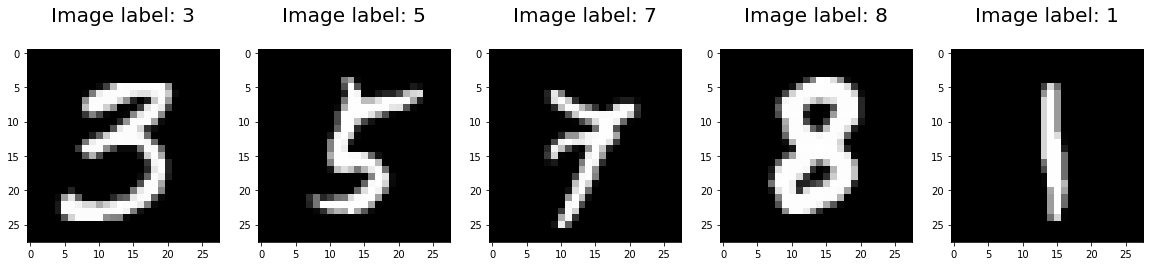

In [4]:
im_list = rd.sample(range(0,len(mnist.data)),5)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[im_list], mnist.target[im_list])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Image label: %i\n' % label, fontsize = 20)

filename = 'Digits.png'
plt.savefig(filename, transparent=False, dpi=200, bbox_inches="tight")

# Implementing Logistic Regression from Scratch

In the sections that follow, the multiclass logistic regression algorithm has been implemented from scratch. Firstly, the data set is divided in to a training set and a testing set in a 80% to 20% ratio. Secondly, the regularized logistic multiclass logistic regression model has been trained on the training set. Finally, the model has been used to predict the target values for the test sample and the accuracy has been quantified.

## Training the Classification Model

In [5]:
# Feature variable matrix (X)
X = mnist.data

# Add ones for the bias term
bias = np.ones((len(X),1))
X = np.concatenate((bias, X), axis = 1)

# Target variable vector (y)
y = mnist.target

print(X.shape)
print(y.shape)

(70000, 785)
(70000,)


In [6]:
# Partioning into Training and Test Data
indices = np.random.permutation(X.shape[0])
pctg = round(0.8*len(X))
training_idx, test_idx = indices[:pctg], indices[pctg:]
X_trn, X_tst = X[training_idx,:], X[test_idx,:]
y_trn, y_tst = y[training_idx], y[test_idx]

print(X_trn.shape)
print(X_tst.shape)
print(y_trn.shape)
print(y_tst.shape)

(56000, 785)
(14000, 785)
(56000,)
(14000,)


In [6]:
# Sigmoid function
def sigmoid(X, theta):
    
    z = np.dot(X, theta)
    h = 1 / (1 + np.exp(-z))
    
    return h

In [7]:
# Loss function
def loss(h, c, lm, theta):
    
    m = len(y)
    
    J = (1/m)*np.sum(-c * np.log(h) - (1-c) * np.log(1 - h)) + (lm/(2*m))*np.sum(np.square(theta))

    return J

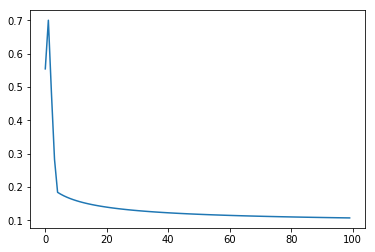

In [9]:
# Check convergence of model
plt.plot(J_hist)

In [12]:
# Gradient Descent 
lr = 0.00001 # learning rate
num_iter = 100 # number of iterations in training the model
lm = 0.1 # regularization parameter
num_class = 10 # number of classes (models) to train

theta_reg = np.zeros((X.shape[1], num_class))

for k in range(num_class):

    c = (y_trn == k) * 1

    J_hist = []

    for i in range(num_iter):

        grad = np.zeros((X_trn.shape[1]))
        h = sigmoid(X_trn, theta_reg[:,k])
        J = loss(h, c, 0.1, theta_reg[:,k])
        J_hist.append(J)
        grad[0] = (1/c.shape[0])*np.dot(X_trn[:,0].T, h-c)
        grad[1:] = (1/c.shape[0])*np.dot(X_trn[:,1:].T, h-c) + (lm/c.shape[0])*theta_reg[1:,k]
        theta_reg[:,k] -= lr*grad

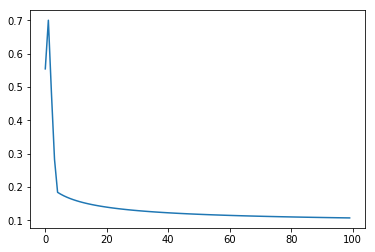

In [13]:
# Check convergence of model
plt.plot(J_hist)

## Making the Prediction

In [14]:
# Predict Values and Validate the Models
h_pred = sigmoid(X_tst,theta).argmax(axis=1)
h_pred_reg = sigmoid(X_tst, theta_reg).argmax(axis=1)
print('Accuracy:', np.round(100*np.mean((y_tst == h_pred_reg) * 1),2), '%')

Accuracy: 88.56 %
Accuracy (Regularized): 88.56 %


# Implementing the Logistic Regression using Scikit Learn

In the sections that follow, the steps of the logistic regression model shown above will be implemented using the scikit-learn toolkit in Python.  

In [8]:
# Partition into training and test sets
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=.2, random_state=0)

print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


In [11]:
# Import the Logistic Regression class and make an instance of the model
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [12]:
# Train the model on the training set
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# Make predictions on the testing set and measure the accuracy
predictions = logisticRegr.predict(test_img)
accuracy = logisticRegr.score(test_img, test_lbl)
print('Accuracy:', np.round(100*accuracy), '%')

Accuracy: 91.0 %
